In [2]:
import pandas as pd
from psycopg2 import connect
import numpy as np
import matplotlib.pyplot as plt


In [52]:
# class Configuration:
#     PG_HOST = 'business-intelligent-db.cw1neqwhyrda.eu-central-1.rds.amazonaws.com'
#     PG_USER = 'postgres'
#     PG_PWD = '52eXzbKbqmY2x45f'

class Configuration:
    PG_HOST = 'localhost'
    PG_USER = 'postgres'
    PG_PWD = 'gherukdnbi6lrn4ieljb549ew9j4v98le5j9v48vl5ee'

In [3]:
PROCESSING_FILE_NAME = '1995.csv'


In [4]:
columns = ['year', 'month', 'day_of_month', 'day_of_week', 'dep_time', 'crs_dep_time', 'arr_time', 'crs_arr_time', 'unique_carrier', 'flight_num', 'tail_num',
           'actual_elapsed_time', 'crs_elapsed_time', 'air_time', 'arr_delay', 'dep_delay', 'origin', 'dest', 'distance', 'taxi_in', 'taxi_out','cancelled',
           'cancellation_code', 'diverted', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
dataset_file_name = f"./dataset/{PROCESSING_FILE_NAME}"
year_flite_df = pd.read_csv(dataset_file_name, 
                    dtype={'dep_time': str,
                            'crs_dep_time': str,
                            'arr_time': str,
                            'crs_arr_time': str}, 
                    skiprows=1,
                    names=columns)

In [4]:
def convert_to_real_time(t):
    t = str(t)
    _len = len(t)
    if _len == 3:
        return f'0{t[:1]}:{t[1:3]}:00'
    elif _len == 4:
        if t == '2400':
            t = '0000'
        return f'{t[:2]}:{t[2:4]}:00'

In [6]:
def transform_data(data):
    # copy
    df = data.copy()
   
    # # transform
    # df['dep_time'] = df["dep_time"].apply(convert_to_real_time)
    # df['crs_dep_time'] = df['crs_dep_time'].apply(convert_to_real_time)
    # df['arr_time'] = df['arr_time'].apply(convert_to_real_time)
    # df['crs_arr_time'] = df['crs_arr_time'].apply(convert_to_real_time)

    return df

In [7]:
def convert_to_time(data):
    df = data.copy()
    # df['dep_time'] = df[["year", "month", "day_of_month", "dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    # df['crs_dep_time'] = df[["year", "month", "day_of_month", "crs_dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    # df['arr_time'] = df[["year", "month", "day_of_month", "arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    # df['crs_arr_time'] = df[["year", "month", "day_of_month", "crs_arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
    return df

In [97]:
year_flite_df.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1996,1,29,1,2039,1930,2245,2139,DL,345,...,6,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1996,1,30,2,1931,1930,2142,2139,DL,345,...,5,22,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1996,1,31,3,1956,1930,2231,2139,DL,345,...,7,27,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1996,1,1,1,1730,1550,1909,1745,DL,411,...,4,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1996,1,2,2,1714,1550,1841,1745,DL,411,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [98]:
year_flite_df[(year_flite_df['arr_time'] < '100')]

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1537,1996,1,9,2,2220,2125,1,2310,UA,797,...,3,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4614,1996,1,23,2,2230,2230,10,25,WN,1285,...,2,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5437,1996,1,25,4,2209,2130,10,2335,WN,252,...,1,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5967,1996,1,21,7,2210,2200,10,5,WN,1231,...,5,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5969,1996,1,23,2,2200,2200,1,5,WN,1231,...,2,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339883,1996,12,14,6,2114,2115,1,8,TW,240,...,4,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5339886,1996,12,17,2,2130,2115,10,8,TW,240,...,2,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5339896,1996,12,28,6,2127,2115,10,8,TW,240,...,2,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5347179,1996,12,27,5,2226,2155,10,2328,AA,805,...,5,32,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Missing Data Check

In [99]:

percentage_missing = year_flite_df.isnull().sum() * 100 / len(year_flite_df)
tbl_percentage_missing = pd.DataFrame({'percentage_missing': percentage_missing})
tbl_percentage_missing

,percentage_missing
year,0.000000
month,0.000000
day_of_month,0.000000
day_of_week,0.000000
dep_time,2.401652
crs_dep_time,0.000000
arr_time,2.665498
crs_arr_time,0.000000
unique_carrier,0.000000
flight_num,0.000000


# Eliminate Missing values
The raw data has some columns that have empty values but the null value is assigned as the "NaN" in the raw csv data. This step will eliminate all null records and/or replace the "NaN" with the numpy nan value

In [5]:
elliminated_null_df = year_flite_df.replace('NaN', np.nan)

# drop columns with ALL NaN
df_drop_col = elliminated_null_df.dropna(axis=1, thresh=1)


# drop rows with ANY NaN
df_drop_row = df_drop_col.dropna(axis=0, thresh=df_drop_col.shape[1]).reset_index(drop=True)
df_drop_row.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted
0,1995,1,6,5,657,645,952,937,UA,482,...,83.0,15.0,12.0,ORD,PHL,678.0,7,25,0,0
1,1995,1,7,6,648,645,938,937,UA,482,...,88.0,1.0,3.0,ORD,PHL,678.0,5,17,0,0
2,1995,1,8,7,649,645,932,937,UA,482,...,83.0,-5.0,4.0,ORD,PHL,678.0,3,17,0,0
3,1995,1,9,1,645,645,928,937,UA,482,...,84.0,-9.0,0.0,ORD,PHL,678.0,3,16,0,0
4,1995,1,10,2,645,645,931,937,UA,482,...,82.0,-6.0,0.0,ORD,PHL,678.0,6,18,0,0


In [8]:
df_transform = transform_data(df_drop_row)
df_transform.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted
0,1995,1,6,5,657,645,952,937,UA,482,...,83.0,15.0,12.0,ORD,PHL,678.0,7,25,0,0
1,1995,1,7,6,648,645,938,937,UA,482,...,88.0,1.0,3.0,ORD,PHL,678.0,5,17,0,0
2,1995,1,8,7,649,645,932,937,UA,482,...,83.0,-5.0,4.0,ORD,PHL,678.0,3,17,0,0
3,1995,1,9,1,645,645,928,937,UA,482,...,84.0,-9.0,0.0,ORD,PHL,678.0,3,16,0,0
4,1995,1,10,2,645,645,931,937,UA,482,...,82.0,-6.0,0.0,ORD,PHL,678.0,6,18,0,0


In [9]:
df_transform = df_transform.dropna(axis=0, thresh=df_transform.shape[1]).reset_index(drop=True)
df_drop_row.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted
0,1995,1,6,5,657,645,952,937,UA,482,...,83.0,15.0,12.0,ORD,PHL,678.0,7,25,0,0
1,1995,1,7,6,648,645,938,937,UA,482,...,88.0,1.0,3.0,ORD,PHL,678.0,5,17,0,0
2,1995,1,8,7,649,645,932,937,UA,482,...,83.0,-5.0,4.0,ORD,PHL,678.0,3,17,0,0
3,1995,1,9,1,645,645,928,937,UA,482,...,84.0,-9.0,0.0,ORD,PHL,678.0,3,16,0,0
4,1995,1,10,2,645,645,931,937,UA,482,...,82.0,-6.0,0.0,ORD,PHL,678.0,6,18,0,0


In [103]:
# Function to check if the df_drop_now has any arr_time null records
null_idx = pd.isna(df_drop_row["arr_time"])
df_drop_row[null_idx]

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted


In [26]:
df_transform.iloc[540:650][(df_transform['month']==10) & (df_transform['day_of_month']==4)]

/var/folders/tg/gm6jtqgd149966jkl848drtm0000gp/T/ipykernel_91452/3175645348.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_transform.iloc[540:650][(df_transform['month']==10) & (df_transform['day_of_month']==4)]


,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted


In [104]:
# 
print("Number of sample records: ", len(elliminated_null_df))
print("Number of initial columns: ", len(elliminated_null_df.columns))
print("Number of records after eliminating NaN values: ", len(df_transform))
print("Number of columns after eliminating NaN values: ", len(df_transform.columns))

Number of sample records:  5351983
Number of initial columns:  29
Number of records after eliminating NaN values:  5034804
Number of columns after eliminating NaN values:  23


In [24]:
df_drop_row.head()


,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted
0,1995,1,6,5,657,645,952,937,UA,482,...,83.0,15.0,12.0,ORD,PHL,678.0,7,25,0,0
1,1995,1,7,6,648,645,938,937,UA,482,...,88.0,1.0,3.0,ORD,PHL,678.0,5,17,0,0
2,1995,1,8,7,649,645,932,937,UA,482,...,83.0,-5.0,4.0,ORD,PHL,678.0,3,17,0,0
3,1995,1,9,1,645,645,928,937,UA,482,...,84.0,-9.0,0.0,ORD,PHL,678.0,3,16,0,0
4,1995,1,10,2,645,645,931,937,UA,482,...,82.0,-6.0,0.0,ORD,PHL,678.0,6,18,0,0


In [10]:
df_transform = convert_to_time(df_transform)
df_transform.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted
0,1995,1,6,5,657,645,952,937,UA,482,...,83.0,15.0,12.0,ORD,PHL,678.0,7,25,0,0
1,1995,1,7,6,648,645,938,937,UA,482,...,88.0,1.0,3.0,ORD,PHL,678.0,5,17,0,0
2,1995,1,8,7,649,645,932,937,UA,482,...,83.0,-5.0,4.0,ORD,PHL,678.0,3,17,0,0
3,1995,1,9,1,645,645,928,937,UA,482,...,84.0,-9.0,0.0,ORD,PHL,678.0,3,16,0,0
4,1995,1,10,2,645,645,931,937,UA,482,...,82.0,-6.0,0.0,ORD,PHL,678.0,6,18,0,0


In [89]:
df_transform.query('arr_time.str.contains("None")', engine='python')


,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted


In [107]:
df_transform.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'dep_time',
       'crs_dep_time', 'arr_time', 'crs_arr_time', 'unique_carrier',
       'flight_num', 'tail_num', 'actual_elapsed_time', 'crs_elapsed_time',
       'air_time', 'arr_delay', 'dep_delay', 'origin', 'dest', 'distance',
       'taxi_in', 'taxi_out', 'cancelled', 'diverted'],
      dtype='object')

### Recheck missing values

In [71]:
percentage_missing = df_transform.isnull().sum() * 100 / len(df_transform)
tbl_percentage_missing = pd.DataFrame({'percentage_missing': percentage_missing})
tbl_percentage_missing

,percentage_missing
year,0.0
month,0.0
day_of_month,0.0
day_of_week,0.0
dep_time,0.0
crs_dep_time,0.0
arr_time,0.0
crs_arr_time,0.0
unique_carrier,0.0
flight_num,0.0


## Save to processed records to result csv

In [25]:
# Copy removed df result to result directory
result_file_name = f"./result/{PROCESSING_FILE_NAME}"
df_transform.to_csv(result_file_name, index=False, header=True)

In [11]:
df_transform

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,diverted
0,1995,1,6,5,657,645,952,937,UA,482,...,83.0,15.0,12.0,ORD,PHL,678.0,7,25,0,0
1,1995,1,7,6,648,645,938,937,UA,482,...,88.0,1.0,3.0,ORD,PHL,678.0,5,17,0,0
2,1995,1,8,7,649,645,932,937,UA,482,...,83.0,-5.0,4.0,ORD,PHL,678.0,3,17,0,0
3,1995,1,9,1,645,645,928,937,UA,482,...,84.0,-9.0,0.0,ORD,PHL,678.0,3,16,0,0
4,1995,1,10,2,645,645,931,937,UA,482,...,82.0,-6.0,0.0,ORD,PHL,678.0,6,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219135,1995,12,12,2,2217,2215,2332,2332,TW,427,...,118.0,0.0,2.0,STL,DEN,770.0,5,12,0,0
5219136,1995,12,13,3,2216,2215,2355,2332,TW,427,...,129.0,23.0,1.0,STL,DEN,770.0,6,24,0,0
5219137,1995,12,14,4,2215,2215,2341,2332,TW,427,...,125.0,9.0,0.0,STL,DEN,770.0,5,16,0,0
5219138,1995,12,15,5,2236,2215,2348,2332,TW,427,...,114.0,16.0,21.0,STL,DEN,770.0,5,13,0,0


## Analysis statistics

<Axes: xlabel='month'>

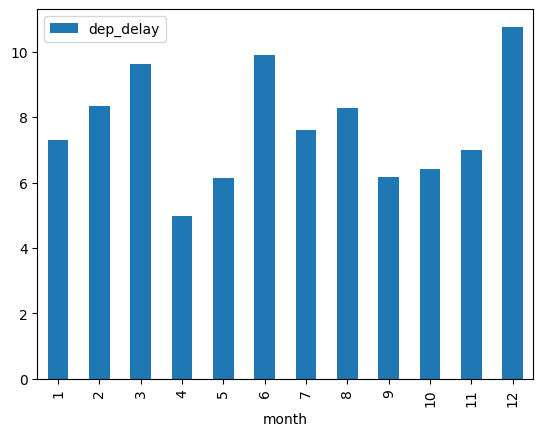

In [72]:
grouped = df_transform[['dep_delay', 'month']].groupby('month').mean()
grouped.plot(kind='bar')

<Axes: xlabel='unique_carrier'>

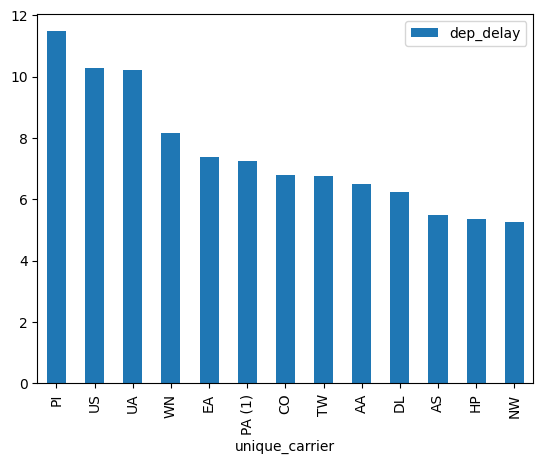

In [73]:
grouped1 = df_transform[['dep_delay', 'unique_carrier']].groupby('unique_carrier').filter(lambda x: len(x)>10)
grouped2 = grouped1.groupby('unique_carrier').mean()
carrier = grouped2.sort_values(['dep_delay'], ascending=False)

# display top 15 destination carriers by delay (from ORD)
carrier[:15].plot(kind='bar')

In [37]:
# Not use anymore
df['dep_time'] = df["dep_time"].apply(convert_to_real_time)
df['crs_dep_time'] = df['crs_dep_time'].apply(convert_to_real_time)
df['arr_time'] = df['arr_time'].apply(convert_to_real_time)
df['crs_arr_time'] = df['crs_arr_time'].apply(convert_to_real_time)


NameError: name 'df' is not defined

In [118]:
# Not use anymore
df['dep_time'] = df[["year", "month", "day_of_month", "dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
df['crs_dep_time'] = df[["year", "month", "day_of_month", "crs_dep_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
df['arr_time'] = df[["year", "month", "day_of_month", "arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)
df['crs_arr_time'] = df[["year", "month", "day_of_month", "crs_arr_time"]].apply(lambda x: f'{x[0]}-{x[1]:02}-{x[2]:02} {x[3]}', axis=1)

In [43]:
# Should use in another file
import psycopg2
import os


def copy_from_file(conn, df, table):
    # save the dataframe on disk as a csv file, load
    # the csv file and use copy_from() to copy it to the table
    tmp_df = f"./result/{PROCESSING_FILE_NAME}"
    # df.to_csv(tmp_df, header=True, index=False)
    f = open(tmp_df, 'r')
    cursor = conn.cursor()
    try:
        cursor.copy_from(f, table, sep=',')
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        # os.remove(tmp_df)
        print("Error: %s" %error)
        conn.rollback()
        conn.close()
        return 1
    print("copy_from_file() done")
    cursor.close()
    # os.remove(tmp_df)

In [50]:
df_transform.dtypes

year                     int64
month                    int64
day_of_month             int64
day_of_week              int64
dep_time                object
crs_dep_time            object
arr_time                object
crs_arr_time            object
unique_carrier          object
flight_num               int64
actual_elapsed_time    float64
crs_elapsed_time         int64
arr_delay              float64
dep_delay              float64
origin                  object
dest                    object
distance               float64
cancelled                int64
diverted                 int64
dtype: object

In [49]:
# connect to our postgres DB
conn = connect(host=Configuration.PG_HOST,
                user=Configuration.PG_USER,
                password=Configuration.PG_PWD,
                database="airline",
                port=5432)
copy_from_file(conn, df_transform, 'flight')

Error: invalid input syntax for type integer: "year"
CONTEXT:  COPY flight, line 1, column year: "year"



1

In [126]:
elliminated_null_df.iloc[51:53]

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
51,1987,10,11,7,1505,1505,1602,1608,PS,1453,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
52,1987,10,12,1,NaN,1505,NaN,1608,PS,1453,...,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,NaN


In [117]:
df.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,test
0,1987,10,14,3,07:41:00,07:30:00,09:12:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-14 07:41:00
1,1987,10,15,4,07:29:00,07:30:00,09:03:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-15 07:29:00
2,1987,10,17,6,07:41:00,07:30:00,09:18:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-17 07:41:00
3,1987,10,18,7,07:29:00,07:30:00,08:47:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-18 07:29:00
4,1987,10,19,1,07:49:00,07:30:00,09:22:00,08:49:00,PS,1451,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1987-10-19 07:49:00


In [116]:
import io, csv
sio = io.StringIO()
writer = csv.writer(sio)
writer.writerows(df.values)
sio.seek(0)

with conn.cursor() as c:
    c.copy_from(
        file=sio,
        table="flight",
        columns=columns,
        sep=","
    )
    conn.commit()

BadCopyFileFormat: extra data after last expected column
CONTEXT:  COPY flight, line 1: "1987,10,14,3,07:41:00,07:30:00,09:12:00,08:49:00,PS,1451,nan,91.0,79,nan,23.0,11.0,SAN,SFO,447.0,nan..."


In [89]:
df[['dep_time', 'crs_dep_time', 'dep_delay']].head()

,dep_time,crs_dep_time,dep_delay
0,07:41:00,07:30:00,11.0
1,07:29:00,07:30:00,-1.0
2,07:41:00,07:30:00,11.0
3,07:29:00,07:30:00,-1.0
4,07:49:00,07:30:00,19.0


In [87]:
df.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,...,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1987,10,14,3,07:41:00,07:30:00,09:12:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,07:29:00,07:30:00,09:03:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,07:41:00,07:30:00,09:18:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,07:29:00,07:30:00,08:47:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,07:49:00,07:30:00,09:22:00,08:49:00,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Eliminating Samples or Features with Missing Values

In [25]:
# Drop columns with ALL NaN
df_96 = df_96.dropna(axis=1, how='all')
# Drop rows with ANY NaN
df_96 = df_96.dropna(axis=0, thresh=df_96.shape[1])

In [28]:
df_96.describe()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,5209326.0,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5.209326e+06,5209326.0,5209326.0
mean,1996.0,6.555528e+00,1.576909e+01,3.939960e+00,1.355100e+03,1.322840e+03,1.500954e+03,1.477667e+03,9.958840e+02,1.195761e+02,1.197676e+02,9.971348e+01,9.673284e+00,9.929403e+00,7.136812e+02,5.631598e+00,1.423271e+01,0.0,0.0
std,0.0,3.427297e+00,8.798858e+00,1.995568e+00,4.762745e+02,4.941378e+02,4.959666e+02,5.117228e+02,6.586318e+02,6.711781e+01,6.622149e+01,6.363628e+01,3.028406e+01,2.864965e+01,5.388000e+02,4.107028e+00,9.351258e+00,0.0,0.0
min,1996.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-2.340000e+02,1.500000e+01,1.000000e+00,-1.426000e+03,-6.800000e+01,1.100000e+01,1.000000e+00,1.000000e+00,0.0,0.0
25%,1996.0,4.000000e+00,8.000000e+00,2.000000e+00,9.380000e+02,9.240000e+02,1.121000e+03,1.110000e+03,4.470000e+02,7.000000e+01,7.000000e+01,5.300000e+01,-5.000000e+00,-1.000000e+00,3.250000e+02,3.000000e+00,9.000000e+00,0.0,0.0
50%,1996.0,7.000000e+00,1.600000e+01,4.000000e+00,1.340000e+03,1.325000e+03,1.528000e+03,1.520000e+03,8.820000e+02,1.020000e+02,1.010000e+02,8.200000e+01,2.000000e+00,0.000000e+00,5.590000e+02,5.000000e+00,1.200000e+01,0.0,0.0
75%,1996.0,1.000000e+01,2.300000e+01,6.000000e+00,1.740000e+03,1.727000e+03,1.921000e+03,1.912000e+03,1.516000e+03,1.510000e+02,1.510000e+02,1.290000e+02,1.300000e+01,9.000000e+00,9.500000e+02,7.000000e+00,1.700000e+01,0.0,0.0
max,1996.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,3.369000e+03,8.980000e+02,1.592000e+03,1.193000e+03,1.416000e+03,1.438000e+03,4.502000e+03,5.800000e+02,4.810000e+02,0.0,0.0


In [21]:
# check the number of null data
df_96.isnull().sum() * 100/len(df_96)

Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              2.401652
CRSDepTime           0.000000
ArrTime              2.665498
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000000
ActualElapsedTime    2.665498
CRSElapsedTime       0.086809
AirTime              2.665498
ArrDelay             2.665498
DepDelay             2.401652
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
Cancelled            0.000000
Diverted             0.000000
dtype: float64

In [16]:
# gives some infomations on columns types and number of null values
df_info=pd.DataFrame(df_96.dtypes).T.rename(index={0:'column type'})
df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()).T.rename(index={0:'null values:'}))
df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()/df_96.shape[0]*100).T.rename(index={0:'null values (%)'}))
df_info

/var/folders/g_/k80jk1510nv2x3zggx95y3p40000gn/T/ipykernel_6930/1814321294.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()).T.rename(index={0:'null values:'}))
/var/folders/g_/k80jk1510nv2x3zggx95y3p40000gn/T/ipykernel_6930/1814321294.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info=df_info.append(pd.DataFrame(df_96.isnull().sum()/df_96.shape[0]*100).T.rename(index={0:'null values (%)'}))


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
column type,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,...,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64
null values:,0,0,0,0,128536,0,142657,0,0,0,...,0,0,0,5351983,0,5351983,5351983,5351983,5351983,5351983
null values (%),0.0,0.0,0.0,0.0,2.401652,0.0,2.665498,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
